# POS Tagging

In [29]:
import nltk
from nltk import word_tokenize

text = """
Infrastructure is often regarded as not giving a strategic advantage in itself (except when the product you are selling *is* the infrastructure).
You need to be able to build something on top of it to support the business processes. Therefore infrastructure technology is often bought and licensed from third parties.
"""

tokens = word_tokenize(text)
tags = nltk.pos_tag(tokens,tagset="universal")

In [30]:
tags

[('Infrastructure', 'NOUN'),
 ('is', 'VERB'),
 ('often', 'ADV'),
 ('regarded', 'VERB'),
 ('as', 'ADP'),
 ('not', 'ADV'),
 ('giving', 'VERB'),
 ('a', 'DET'),
 ('strategic', 'ADJ'),
 ('advantage', 'NOUN'),
 ('in', 'ADP'),
 ('itself', 'PRON'),
 ('(', '.'),
 ('except', 'ADP'),
 ('when', 'ADV'),
 ('the', 'DET'),
 ('product', 'NOUN'),
 ('you', 'PRON'),
 ('are', 'VERB'),
 ('selling', 'VERB'),
 ('*', 'NOUN'),
 ('is', 'VERB'),
 ('*', 'DET'),
 ('the', 'DET'),
 ('infrastructure', 'NOUN'),
 (')', '.'),
 ('.', '.'),
 ('You', 'PRON'),
 ('need', 'VERB'),
 ('to', 'PRT'),
 ('be', 'VERB'),
 ('able', 'ADJ'),
 ('to', 'PRT'),
 ('build', 'VERB'),
 ('something', 'NOUN'),
 ('on', 'ADP'),
 ('top', 'NOUN'),
 ('of', 'ADP'),
 ('it', 'PRON'),
 ('to', 'PRT'),
 ('support', 'VERB'),
 ('the', 'DET'),
 ('business', 'NOUN'),
 ('processes', 'VERB'),
 ('.', '.'),
 ('Therefore', 'VERB'),
 ('infrastructure', 'NOUN'),
 ('technology', 'NOUN'),
 ('is', 'VERB'),
 ('often', 'ADV'),
 ('bought', 'ADJ'),
 ('and', 'CONJ'),
 ('licens

# Test

In [48]:
import nltk

sentence = "Apple is looking at buying U.K. startup for $1 billion"

# Perform POS tagging on the sentence
pos_tags = nltk.pos_tag(nltk.word_tokenize(sentence))

# Perform NER on the sentence
ner_tags = nltk.ne_chunk(pos_tags)

# Extract named entities and important parts of speech
named_entities = []
important_pos = ["NN", "NNS", "NNP", "NNPS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

for chunk in ner_tags:
    
    if type(chunk) == tuple:
        ner_tag = chunk[1]
    else:
        pos_tag = chunk[0][1]
        ner_tag = chunk.label()

    if hasattr(chunk, "label") and ner_tag == "NE":
        named_entities.append(" ".join([token[0] for token in chunk]))
    elif pos_tag in important_pos:
        named_entities.append(chunk[0])

# Print the results
print("Named entities:", named_entities)


Named entities: [('Apple', 'NNP'), 'is', 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$', '1', 'billion']


In [53]:
import spacy

nlp = spacy.load("en_core_web_sm")

sentence = "The quick brown fox jumps over the lazy dog. Apple"

# Perform NER, POS tagging, and dependency parsing on the sentence
doc = nlp(sentence)

# Extract named entities and important parts of the sentence
named_entities = []
important_parts = []

for token in doc:
    if token.ent_type_ != "":
        named_entities.append(token)
    elif token.pos_ in ["NOUN", "VERB", "ADJ"]:
        important_parts.append(token)

    # Check if the token is a subject or object of a verb
    if token.dep_ in ["nsubj", "nsubjpass", "dobj", "pobj"]:
        important_parts.append(token)

# Print the results
print("Named entities:", [ne.text for ne in named_entities])
#important_parts = set(important_parts)
print("Important parts of the sentence:", [ip.text for ip in important_parts])


Named entities: ['Apple']
Important parts of the sentence: ['quick', 'brown', 'fox', 'fox', 'jumps', 'lazy', 'dog', 'dog']


In [62]:
import nltk

# Define the sentence to analyze
sentence = "The quick brown fox jumped over the lazy dog."

# Tokenize the sentence into individual words
tokens = nltk.word_tokenize(sentence)

# Perform POS tagging on the tokens
tagged_tokens = nltk.pos_tag(tokens)

# Define a grammar for chunking noun phrases and verb phrases
grammar = r"""
  NP: {<DT|PRP\$>?<JJ>*<NN>+}   # chunk determiner/possessive, adjectives and nouns
  VP: {<VB.*><RP>?<RB>?<VB.*>?} # chunk verbs and their adverbs and particles
"""

# Create a chunk parser using the grammar
chunk_parser = nltk.RegexpParser(grammar)

# Parse the tagged tokens into chunks
chunks = chunk_parser.parse(tagged_tokens)

# Define a function to extract a flattened list of all phrases of a specific type from the chunks
def extract_phrases(chunked_tokens, phrase_type):
    phrases = []
    for subtree in chunked_tokens.subtrees(filter=lambda t: t.label() == phrase_type):
        phrases.append(" ".join(word for word, tag in subtree.leaves()))
    return phrases

# Extract all noun phrases and verb phrases from the sentence
noun_phrases = extract_phrases(chunks, "NP")
verb_phrases = extract_phrases(chunks, "VP")

# Print the noun phrases and verb phrases
print("Noun phrases:", noun_phrases)
print("Verb phrases:", verb_phrases)


Noun phrases: ['The quick brown fox', 'the lazy dog']
Verb phrases: ['jumped']


# Rake_NLTK

In [45]:
from rake_nltk import Rake
import nltk

In [46]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manuv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manuv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
r = Rake()
my_text = """
There are many reasons to want to automate as much as possible in DevOps, DataOps, and MLOps. 
The most obvious reason is to speed up the process and to make it more efficient. 
Automation can also help to improve the accuracy and consistency of results, as well as reduce the chances of human error. 
Additionally, automating tasks can free up time for more important tasks, such as problem-solving and innovation.
""" 
r.extract_keywords_from_text(my_text)
keywordList           = []
rankedList            = r.get_ranked_phrases_with_scores()
for keyword in rankedList:
  keyword_updated       = keyword[1].split()
  keyword_updated_string    = " ".join(keyword_updated[:2])
  keywordList.append(keyword_updated_string)
  if(len(set(keywordList))>9):
    break
print(set(keywordList))

rake_marks = list(set(keywordList))

{'human error', 'obvious reason', 'many reasons', 'automating tasks', 'also help', 'time', 'important tasks', 'well', 'speed', 'want'}


# TextRank

In [48]:
import spacy
import pytextrank
# example text

textrank_marks = []
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(my_text)
# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    textrank_marks.append(phrase.text)

textrank_marks = [mark.replace('\n','') for mark in textrank_marks]
print(textrank_marks)

['human error', 'innovation', 'MLOps', 'DataOps', 'tasks', 'many reasons', 'results', 'DevOps', 'consistency', 'time']


# WordCloud

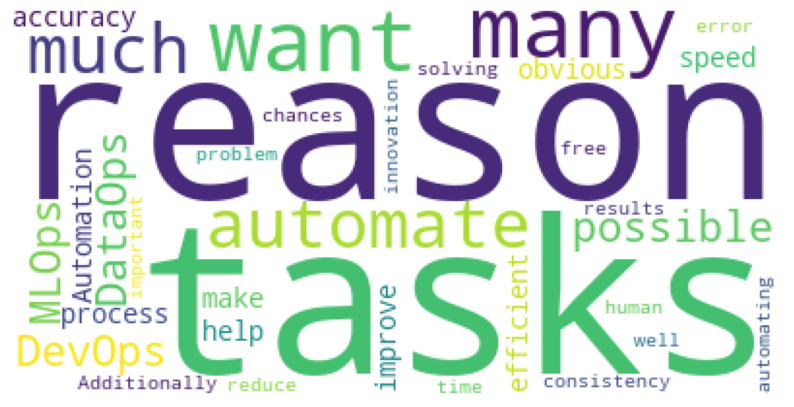

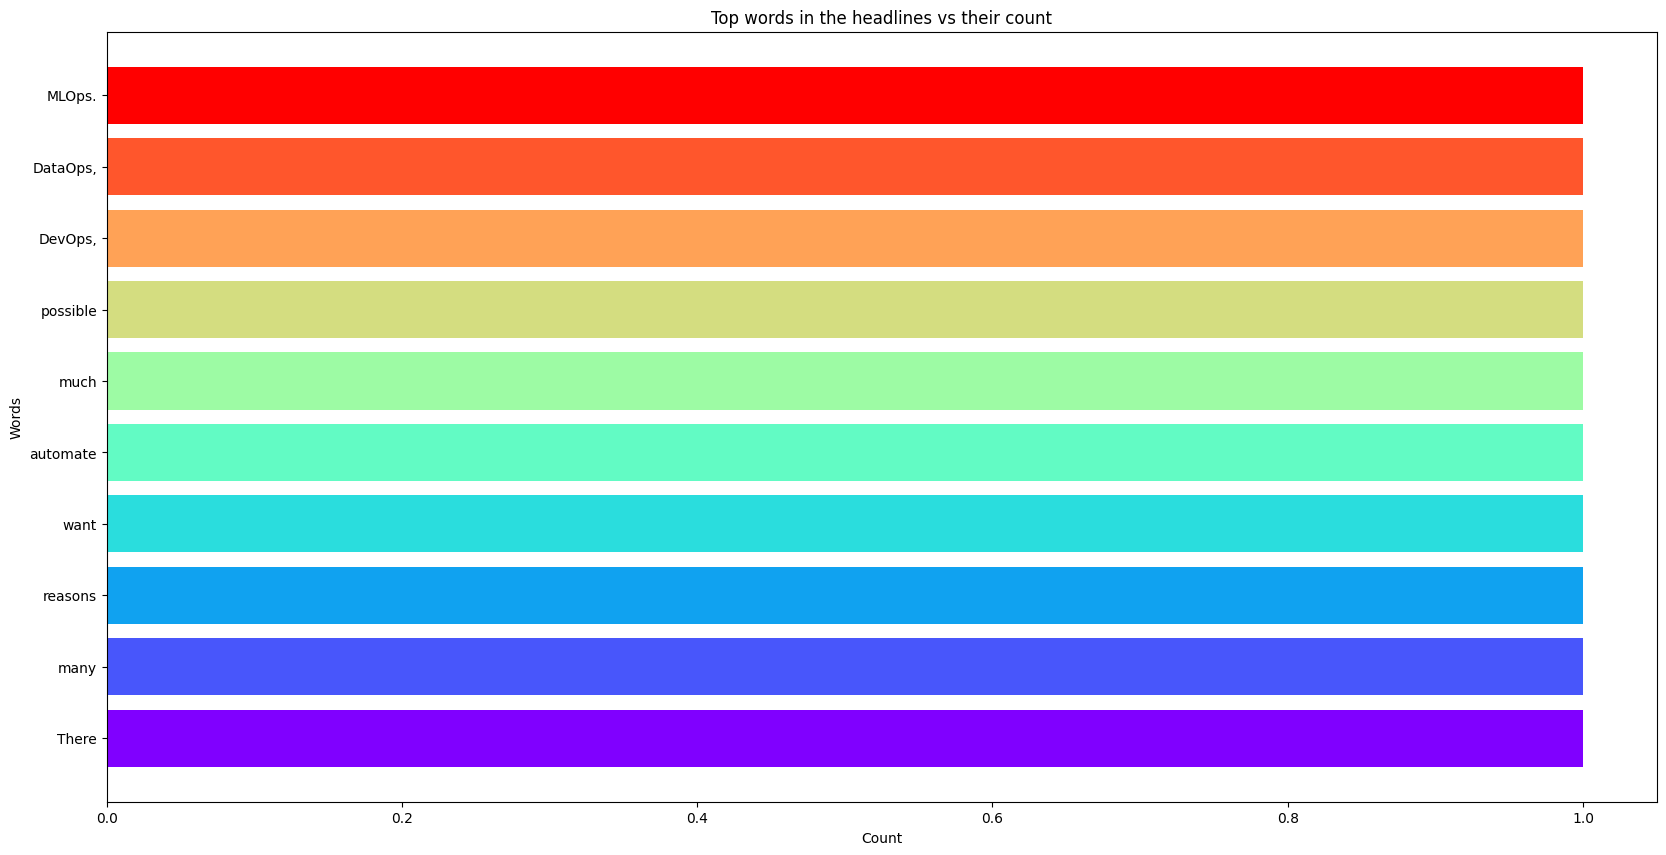

In [49]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(my_text)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filtered_words = [word for word in my_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()

# KeyBERT

In [50]:
from keybert import KeyBERT

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(my_text)
print(keywords)

keybert_marks = [keyword[0] for keyword in keywords]

[('automation', 0.5676), ('automate', 0.5549), ('automating', 0.4368), ('dataops', 0.3625), ('devops', 0.35)]


# Yake(Yet another Keyword Extractor)

In [51]:
import yake

yake_marks = []
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(my_text)
for kw in keywords:
  print(kw)
  yake_marks.append(kw[0])

yake_marks.reverse()

yake_marks = yake_marks[:10]

('DataOps', 0.0860794396613484)
('obvious reason', 0.11681058472797667)
('DevOps', 0.11943095138791648)
('MLOps', 0.11943095138791648)
('automate', 0.15583784475581464)
('consistency of results', 0.24464641953252544)
('human error', 0.24464641953252544)
('tasks', 0.2597973968398528)
('reasons', 0.26772632618743963)
('reason', 0.26772632618743963)
('improve the accuracy', 0.3042192236293721)
('accuracy and consistency', 0.3042192236293721)
('reduce the chances', 0.3042192236293721)
('chances of human', 0.3042192236293721)
('automating tasks', 0.3112468130336433)
('efficient', 0.3202131693847967)
('problem-solving and innovation', 0.3224581171410697)
('Additionally', 0.3687112298653026)
('important tasks', 0.38376191745367455)
('obvious', 0.3906713812385729)


# MonkeyLearn API
[website](https://monkeylearn.com/keyword-extractor-online/)

In [52]:
my_text

'\nThere are many reasons to want to automate as much as possible in DevOps, DataOps, and MLOps. \nThe most obvious reason is to speed up the process and to make it more efficient. \nAutomation can also help to improve the accuracy and consistency of results, as well as reduce the chances of human error. \nAdditionally, automating tasks can free up time for more important tasks, such as problem-solving and innovation.\n'

In [53]:
# payed plan

# TextRazor
[website](https://www.textrazor.com/demo)

In [54]:
API_KEY = '42acc4018111e29f626f458272bd34981a5b2b268c5fc8dbcacd7ab5'

In [55]:
import textrazor
textrazor.api_key = API_KEY
client = textrazor.TextRazor(extractors=["entities", "topics"])# entities, topics, words, phrases, dependency-trees, relations, entailments, senses, spelling
response = client.analyze(my_text)
textrazor_ents = {"word": [],"rel_score": [],"conf_score": []}
for entity in response.entities():
    textrazor_ents["word"].append(entity.id)
    textrazor_ents["rel_score"].append(entity.relevance_score)
    textrazor_ents["conf_score"].append(entity.confidence_score)

print(textrazor_ents)

{'word': ['Accuracy and precision', 'Human error', 'Automation', 'Problem solving', 'Innovation', 'Reason', 'DevOps', 'DataOps', 'MLOps'], 'rel_score': [0.3249, 0.1056, 0.4195, 0.4026, 0.2778, 0.2131, 0.4112, 0.3327, 0.196], 'conf_score': [0.9772, 3.603, 2.721, 4.627, 0.975, 1.07, 7.009, 3.389, 2.041]}


In [56]:
# Sort by rel_score
sorted_entities = sorted(
    zip(textrazor_ents["word"], textrazor_ents["rel_score"], textrazor_ents["conf_score"]),
    key=lambda x: x[1],
    reverse=True
)

# Re-populate the textrazor_ents dictionary with the sorted entities
textrazor_ents["word"] = [entity[0] for entity in sorted_entities]
textrazor_ents["rel_score"] = [entity[1] for entity in sorted_entities]
textrazor_ents["conf_score"] = [entity[2] for entity in sorted_entities]
textrazor_ents

{'word': ['Automation',
  'DevOps',
  'Problem solving',
  'DataOps',
  'Accuracy and precision',
  'Innovation',
  'Reason',
  'MLOps',
  'Human error'],
 'rel_score': [0.4195,
  0.4112,
  0.4026,
  0.3327,
  0.3249,
  0.2778,
  0.2131,
  0.196,
  0.1056],
 'conf_score': [2.721, 7.009, 4.627, 3.389, 0.9772, 0.975, 1.07, 2.041, 3.603]}

In [57]:
textrazor_marks = list(set(textrazor_ents["word"][:10]))
textrazor_marks

['Innovation',
 'DataOps',
 'Reason',
 'Problem solving',
 'DevOps',
 'MLOps',
 'Accuracy and precision',
 'Human error',
 'Automation']

# Test with model and GF

In [4]:
context = """
There are many reasons to want to automate as much as possible in DevOps, DataOps, and MLOps. 
The most obvious reason is to speed up the process and to make it more efficient. 
Automation can also help to improve the accuracy and consistency of results, as well as reduce the chances of human error. 
Additionally, automating tasks can free up time for more important tasks, such as problem-solving and innovation.
""" 

In [1]:
# Model
from transformers import T5ForConditionalGeneration, T5TokenizerFast
models_dir = "../saved_models/t5_base_answer-aware-squad_mod"
checkpoint = 't5-base'
# load the saved model
model = T5ForConditionalGeneration.from_pretrained(models_dir)
tokenizer = T5TokenizerFast.from_pretrained(checkpoint)

c:\Users\manuv\miniconda3\envs\t5_qg\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\manuv\miniconda3\envs\t5_qg\Lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your pr

In [5]:
def run_model(input_string,target_answer, **generator_args):
    generator_args = {
    "max_length": 512,
    "num_beams": 4,# bij grotere num_beams is trager maar complexere vragen(niet per se betere vragen)
    "length_penalty": 1.5,
    "no_repeat_ngram_size": 3,
    "early_stopping": True,
    }
    input_string = "generate questions: " + input_string + " " + "<ANSWER>" + target_answer + " </s>"
    input_ids = tokenizer.encode(input_string, return_tensors="pt")
    res = model.generate(input_ids, **generator_args)
    output = tokenizer.batch_decode(res, skip_special_tokens=True)
    output = [item.split("<sep>") for item in output]
    return output


In [61]:
# Not super good
# for word in rake_marks:
#     print(run_model(context,word)[0][0] + " -> " + word)

Automating tasks can help to reduce the chances of what? -> human error
What is the most obvious reason to automate in DevOps? -> obvious reason
What are the reasons to want to automate as much as possible in DevOps? -> many reasons
What can free up time for more important tasks such as problem-solving and innovation? -> automating tasks
Automating tasks can help to improve the accuracy and consistency of results and reduce the chances of human error? -> also help
What can automating tasks free up for more important tasks? -> time
What can automating tasks free up time for? -> important tasks
What is one reason to automate as much as possible in DevOps? -> well
What is the most obvious reason to automate in DevOps? -> speed
What is one reason to automate as much as possible? -> want


In [62]:
# pretty good for finding relevant answers. First word is highest score
for word in textrank_marks:
    print(run_model(my_text,word)[0][0] + " -> " + word)

Automating tasks can help to reduce the chances of what? -> human error
Automating tasks can free up time for more important tasks such as problem-solving and what else? -> innovation
In DevOps, Data Ops, and what other type of process do you want to automate the most? -> MLOps
In DevOps and MLOps, what is the most obvious reason to automate? -> DataOps
Automating tasks can free up time for more important tasks such as problem-solving and innovation? -> tasks
What are the reasons to want to automate as much as possible in DevOps? -> many reasons
What can automate as much as possible? -> results
What is one of the reasons to want to automate as much as possible? -> DevOps
What can automation help to improve? -> consistency
What can automating tasks free up for more important tasks? -> time


In [63]:
# Ok keywords but doesn't work well with T5-answer_aware_model
# for word in keybert_marks:
#     print(run_model(my_text,word)[0][0] + " -> " + word)

What can help to free up time for more important tasks? -> automation
What is one reason to automate as much as possible in DevOps? -> automate
What can free up time for more important tasks such as problem-solving and innovation? -> automating
In DevOps and MLOps, what is one reason to automate as much as possible? -> dataops
What is one of the reasons to want to automate as much as possible? -> devops


In [64]:
# first word is highest. Sometimes weird result not great
# for word in yake_marks:
#     print(run_model(my_text,word)[0][0] + " -> " + word)

What is the most obvious reason to automate in DevOps? -> obvious
What can automating tasks free up time for? -> important tasks
What is another reason to automate as much as possible in DevOps? -> Additionally
Automating tasks can free up time for more important tasks like what? -> problem-solving and innovation
What is one reason to automate as much as possible in DevOps? -> efficient
What can free up time for more important tasks such as problem-solving and innovation? -> automating tasks
Automating tasks can help to reduce the chances of human error? -> chances of human
What is one reason to automate in DevOps? -> reduce the chances
What can automation help to improve in DevOps? -> accuracy and consistency
What can automation help to improve? -> improve the accuracy


In [65]:
# Consistently good but doesn't work always with model. Last word is highest. Should limit to 3
for word in textrazor_marks:
    print(run_model(my_text,word)[0][0] + " -> " + word)

Automating tasks can free up time for more important tasks such as problem-solving and what else? -> Innovation
In DevOps and MLOps, what is the most obvious reason to automate? -> DataOps
What is one reason to automate as much as possible in DevOps? -> Reason
What type of problem solving can be solved by automating tasks? -> Problem solving
What is one of the reasons to want to automate as much as possible? -> DevOps
In DevOps, Data Ops, and what other type of process do you want to automate the most? -> MLOps
What can automation help to improve in DevOps? -> Accuracy and precision
Automating tasks can help to reduce the chances of what? -> Human error
What can help to improve the accuracy and consistency of results? -> Automation


TextRazor and TextRank give best results

In [9]:
import pickle
import os

SAVE_TREE_DIR = os.path.join("C:", os.sep, "Users", "manuv", "OneDrive", "Documenten", "Code", "BAP", "BP_gitrepo", "BP_Info_Support", "data")

with open(os.path.join(SAVE_TREE_DIR,"gf_structure.pkl"), "rb") as f:
    root = pickle.load(f)

chap = root.find_chapter_by_name("03-architecture-guidance").files[1]
structured_text = chap.get_structured_text()['Managing technical complexity']
context = ''
context = [context + stuk_text for stuk_text in structured_text]

In [10]:
context

['Makingthe right technical choicesis very important and also complex. These choices are mainly influenced by thenon-functional requirements. And when you make these choices, it is important to have themmotivated and approvedso thatstakeholdersare on board and also enableseasy on and off-boardingof team members.However, to make theright technical choices, thecontextneeds to be clear. Therefore, it is very important to identify service boundaries correctly.',
 'Within different services, requirements can be very different, leading to very different technical choices.E.g. A Mobile app is very different from a Data Analysis system. Thereforeseveral archetypesare identified, to enable the possibility to create specific guidance and best practices related to these archetypes.These things typically end up being described in theTechnical software architecture.']